In [2]:
%matplotlib inline

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from corner import corner

In [40]:
### 2-d case
def logL(x):
    '''
    Here we generate samples according to the target distribution: 
    x0~N(0,1); x1~N(5,2).
    In general, we generate samples according to the model decided by 
    the input data. 
    '''
    mean = 0; std = 1;
    mean2 = 5; std2 = 2;
    _logL = -0.5*(x[0]-mean)**2/std**2 -0.5*(x[1]-mean2)**2/std2**2
    
    return _logL

def prior(x):
    if np.all(x) > -50 and np.all(x) < 50:
        return 1;
    else:
        return -1e6
    
def propo(x, sigma = 2.38):
    '''
    Gaussian distribution as proposal function
    '''
    # Draw x_star
    x_star = x + np.random.randn(len(x)) * sigma
    
    # proposal ratio factor is 1 since jump is symmetric
    qxx = 1
    
    return (x_star, qxx)

$\sigma_{\rm jump} = 2.38 \sigma_{\rm posterior} / n_{\rm dim}$

In [57]:
def mc_sampler(x0, post_0, logL, prior, propo):
    '''
    from current sample to the next sample
    '''
    x1 , factor = propo(x0)
    
    u = np.random.uniform(0,1)
    
    ### posterior for the next sample
    post_1 = logL(x1)*prior(x1)
    
    H = np.exp(post_1 - post_0)*factor
    
    if u < H:
        
        x0 = x1 ## accept the proposed sample
        post_0 = post_1
    
    return x0, post_0  

In [43]:
### posterior for the initial sample
x0 = [10,20]
post_0 = logL(x0)*prior(x0)

itera = 10000; samples = np.zeros((itera,2))

for ii in range(itera):
    
    x0, post_0 = mc_sampler(x0, post_0, logL, prior, propo)
    samples[ii] = x0

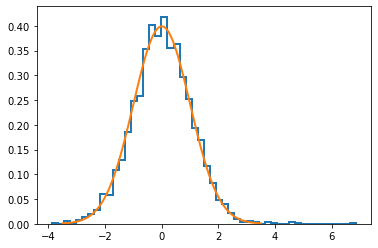

In [45]:
plt.hist(samples[:,0], density = True, bins = 50, histtype = 'step', lw = 2)
xx = np.linspace(-3.5, 3.5, 1000)
plt.plot(xx, scipy.stats.norm(loc=0, scale=1).pdf(xx), lw=2)

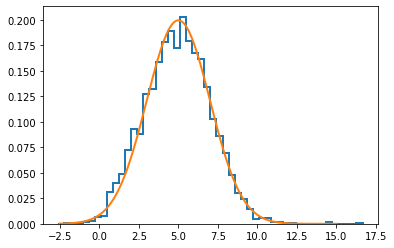

In [47]:
plt.hist(samples[:,1], density = True, bins = 50, histtype = 'step', lw = 2)
xx = np.linspace(-2.5, 15, 1000)
plt.plot(xx, scipy.stats.norm(loc=5, scale=2).pdf(xx), lw=2)

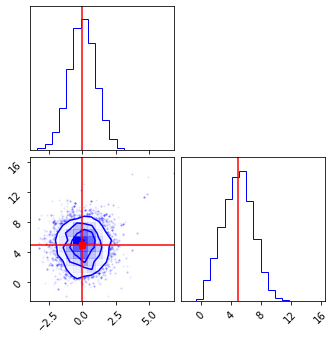

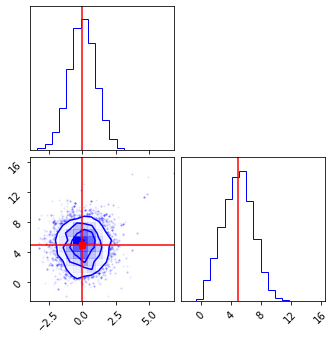

In [56]:
corner(samples, color = 'blue',truths = [0,5], truth_color = 'red')